In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
file = 'Life Expectancy Data.csv'
data = pd.read_csv(file)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the target and features
target = 'Life expectancy '
features = [col for col in data.columns if col != target]

# Separate features and target
X = data[features]
y = data[target]

# Drop rows where the target is missing
data_cleaned = data.dropna(subset=[target])

# Update features and target after cleaning
X = data_cleaned[features]
y = data_cleaned[target]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps
numerical_transformer = Pipeline(steps=[ # Pipeline => sequence of preprocessing steps for data transformation (Consistent , Structured)
    ('imputer', SimpleImputer(strategy='mean')), # replace the missing numerical values with the mean. 
    ('scaler', StandardScaler()) # z-normalization.
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # replace the missing categorical values with the mode.
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # each unique category is represented as a separate binary column. Any unknown categories are ignored.
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer( # ColumnTransformer => apply different preprocessing transformations to different subsets of columns.
    transformers=[ # => List of tuples where each tuple represents (name for transformation , transformer to apply , 
        #  list of columns which the transformation should be applied).
        ('num', numerical_transformer, numerical_cols), 
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2342, 21), (586, 21), (2342,), (586,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score , mean_squared_error , mean_absolute_error

# Create a pipeline for Linear Regression
linear_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model: MAE, MSE, RMSE and R^2 Score
mae_lr = mean_absolute_error(y_test , y_pred_lr)
mse_lr = mean_squared_error(y_test , y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Absolute Error: {mae_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')
print(f'R Squared: {r2_lr}')


Mean Absolute Error: 1.2863764459290652
Mean Squared Error: 4.3227455186545
Root Mean Squared Error: 2.079121333317154
R Squared: 0.9516170600683226


In [15]:
from sklearn.neighbors import KNeighborsRegressor

# Create a pipeline for KNN Regressor
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model: MAE, MSE, RMSE and R^2 Score
mae_knn = mean_absolute_error(y_test , y_pred_knn)
mse_knn = mean_squared_error(y_test , y_pred_knn)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Mean Absolute Error For KNN: {mae_knn}')
print(f'Mean Squared Error For KNN: {mse_knn}')
print(f'Root Mean Squared Error For KNN: {rmse_knn}')
print(f'R Squared For KNN: {r2_knn}')


Mean Absolute Error For KNN: 1.9182935153583625
Mean Squared Error For KNN: 9.554748122866897
Root Mean Squared Error For KNN: 3.0910755608472105
R Squared For KNN: 0.893057131747402



Comparison Between Linear Regression and KNN Regressor:
Linear Regression - RMSE: 2.079121333317154, R²: 0.9516170600683226
KNN Regressor - RMSE: 3.0910755608472105, R²: 0.893057131747402

Linear Regression performs better based on lower RMSE and higher R².


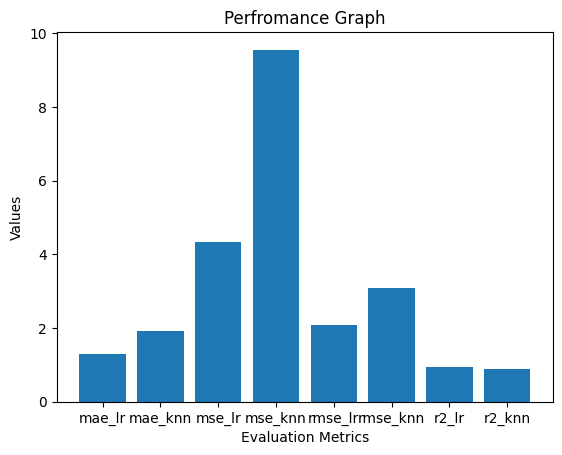

In [14]:
# Compare the two models
print("\nComparison Between Linear Regression and KNN Regressor:")
print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"KNN Regressor - RMSE: {rmse_knn}, R²: {r2_knn}")

if rmse_lr < rmse_knn and r2_lr > r2_knn:
    print("\nLinear Regression performs better based on lower RMSE and higher R².")
elif rmse_knn < rmse_lr and r2_knn > r2_lr:
    print("\nKNN Regressor performs better based on lower RMSE and higher R².")
else:
    print("\nThe performance of the two models is comparable, or trade-offs exist between RMSE and R².")

labels = [ 'mae_lr','mae_knn','mse_lr', 'mse_knn','rmse_lr', 'rmse_knn', 'r2_lr', 'r2_knn']
values = [mae_lr, mae_knn, mse_lr, mse_knn, rmse_lr, rmse_knn, r2_lr, r2_knn]
plt.bar(labels, values)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Perfromance Graph')
plt.show()





In [9]:
# Display the accuracy (R²) for both models
print("\nModel Accuracies (R²):")
print(f"Accuracy (R²) for Linear Regression: {r2_lr * 100:.2f}%")
print(f"Accuracy (R²) for KNN Regressor: {r2_knn * 100:.2f}%")



Model Accuracies (R²):
Accuracy (R²) for Linear Regression: 95.16%
Accuracy (R²) for KNN Regressor: 89.31%


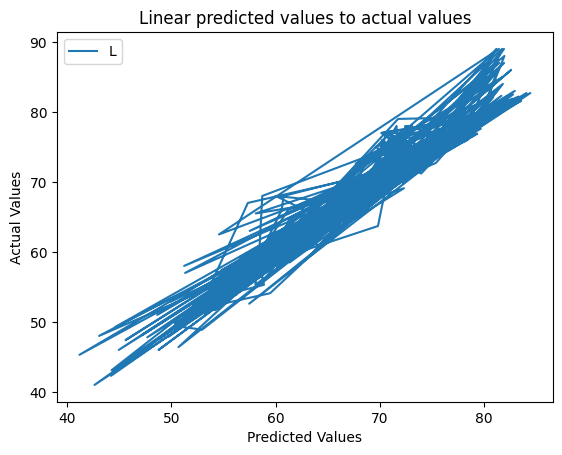

In [10]:
plt.plot(y_pred_lr , y_test)
plt.title('Linear predicted values to actual values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend('Linear Regression')
plt.show()



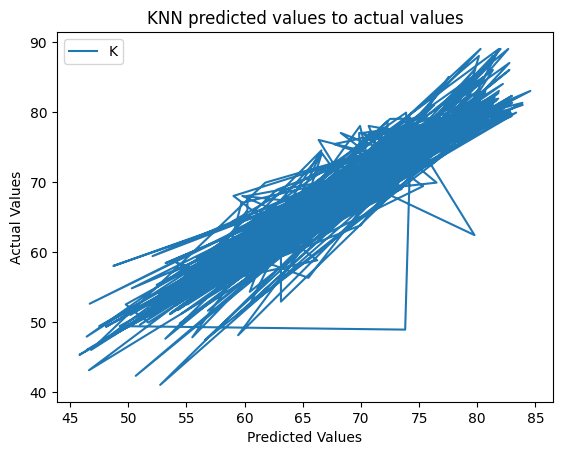

In [11]:
plt.plot(y_pred_knn, y_test)
plt.title('KNN predicted values to actual values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend('KNN Regression')
plt.show()